In [1]:
import pandas as pd
import numpy as np
import gensim
import os
from gensim.models.doc2vec import *
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorlover as cl
from IPython.display import HTML

In [2]:
df = pd.read_csv(os.getcwd() + '/' + '100Paragraphs_150Words.csv', index_col = 0)

In [3]:
df.head()

,text,author,sex,period
0,than ever over at the house the main building ...,KateChopin,female,realism
1,lost in some inward maze of contemplation or t...,KateChopin,female,realism
2,about himself he was very young and did not kn...,KateChopin,female,realism
3,his wife with her inattention her habitual neg...,KateChopin,female,realism
4,on hand to say goodby to him his wife stood sm...,KateChopin,female,realism


In [4]:
authors = list(set((df['author'])))

In [5]:
# split 
def split_by_authors():
    df_split ={}
    for author in authors:
        df_ = df[df['author'] == author]
        df_split[author] = df_
    return df_split

df_by_authors = split_by_authors()

In [6]:
train_set_df = pd.DataFrame(columns=list(df.columns))
test_set_df = pd.DataFrame(columns=list(df.columns))
validation_set_df = pd.DataFrame(columns=list(df.columns))
for author in authors:
    train_set = df_by_authors[author].sample(70)
    test_val_set = df_by_authors[author].drop(train_set.index)
    validation_set = test_val_set.sample(5)
    test_set = test_val_set.drop(validation_set.index)
    train_set_df = pd.concat([train_set_df,train_set])
    test_set_df = pd.concat([test_set_df,test_set])
    validation_set_df = pd.concat([validation_set_df,validation_set])

In [7]:
# resetting the index
train_set_df = train_set_df.reset_index()
test_set_df = test_set_df.reset_index()
validation_set_df = validation_set_df.reset_index()

In [8]:
# Create TaggedDocument objects for train_corpus
train_corpus = []
for i in range(0, len(train_set_df)):
    doc = TaggedDocument(train_set_df['text'][i].split(), [train_set_df['author'][i], 
                                                            train_set_df['period'][i], 
                                                            train_set_df['sex'][i]])   
    train_corpus.append(doc)

In [9]:
# Create corpus objects for test_corpus
test_corpus = []
for i in range(0, len(test_set_df)):
    doc = test_set_df['text'][i].split()
    test_corpus.append(doc)
    
# Create corpus objects for val_corpus
val_corpus = []
for i in range(0, len(validation_set_df)):
    doc = validation_set_df['text'][i].split()
    val_corpus.append(doc)

In [10]:
# Declare gyperparamters 
vec_size = 20
min_count = 2
epochs = 20
alpha = 0.025
min_alpha = 0.025

In [11]:
# Doc2Vec - initializing the model

model = Doc2Vec(vector_size=vec_size,
                min_count=min_count,
                epochs=epochs,
                alpha = alpha,
                min_alpha = min_alpha)

model.build_vocab(train_corpus)

%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 6.28 s, sys: 402 ms, total: 6.69 s
Wall time: 2.8 s


In [12]:
len(model.docvecs)
# should be 23
# two for gender, seven for periods, and fourteen for authors 

23

In [13]:
inferred_vector = model.infer_vector(train_corpus[600].words)
sims = model.docvecs.most_similar([inferred_vector])
# print(inferred_vector)
sims

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('gothic/romantic', 0.6915688514709473),
 ('male', 0.6334981322288513),
 ('NathanielHawthorne', 0.6061394810676575),
 ('female', 0.31717684864997864),
 ('MaryWollstonecraft', 0.2321932166814804),
 ('enlightenment', 0.22995281219482422),
 ('MargaretFuller', 0.1622006744146347),
 ('realism', 0.1097201406955719),
 ('KateChopin', 0.09755023568868637),
 ('transcendentalism', 0.08830780535936356)]

In [14]:
inferred_vector = model.infer_vector(test_corpus[0])
sims = dict(model.docvecs.most_similar([inferred_vector]))
# print(inferred_vector)
sims

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



{'female': 0.6348693370819092,
 'realism': 0.5601406097412109,
 'male': 0.5366599559783936,
 'KateChopin': 0.40031033754348755,
 'early_modernism': 0.304549902677536,
 'FScottFitzgerald': 0.29404938220977783,
 'victorian': 0.24782206118106842,
 'enlightenment': 0.21503011882305145,
 'JaneAustin': 0.17711293697357178,
 'JohnLocke': 0.1512746512889862}

In [15]:
inferred_vector = model.infer_vector(test_corpus[0])
sims = dict(model.docvecs.most_similar([inferred_vector]))
# print(inferred_vector)
sims

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



{'female': 0.5984166264533997,
 'realism': 0.5651870965957642,
 'male': 0.544592022895813,
 'KateChopin': 0.4084193706512451,
 'early_modernism': 0.34066811203956604,
 'FScottFitzgerald': 0.2918032705783844,
 'victorian': 0.22698214650154114,
 'JohnLocke': 0.19121718406677246,
 'JaneAustin': 0.18706488609313965,
 'enlightenment': 0.16359543800354004}

In [16]:
def derive_score_train(df, corpus):
    score_list = {}
    for i in range(0, len(test_set_df)):
        cos_sims = []
        inferred_vector = model.infer_vector(corpus[i].words)
        sims = dict(model.docvecs.most_similar([inferred_vector]))
        if test_set_df.iloc[i]['author'] in list(sims.keys()):
            cos_sims.append(sims[test_set_df.iloc[i]['author']])
        if test_set_df.iloc[i]['sex'] in list(sims.keys()):
            cos_sims.append(sims[test_set_df.iloc[i]['sex']])
        if test_set_df.iloc[i]['period'] in list(sims.keys()):
            cos_sims.append(sims[test_set_df.iloc[i]['period']])
        total_score = sum(cos_sims)
        score_list[test_set_df.iloc[i]['index']] = total_score/3
    return score_list

def derive_score_test(df, corpus):
    score_list = {}
    for i in range(0, len(test_set_df)):
        cos_sims = []
        inferred_vector = model.infer_vector(corpus[i])
        sims = dict(model.docvecs.most_similar([inferred_vector]))
        if test_set_df.iloc[i]['author'] in list(sims.keys()):
            cos_sims.append(sims[test_set_df.iloc[i]['author']])
        if test_set_df.iloc[i]['sex'] in list(sims.keys()):
            cos_sims.append(sims[test_set_df.iloc[i]['sex']])
        if test_set_df.iloc[i]['period'] in list(sims.keys()):
            cos_sims.append(sims[test_set_df.iloc[i]['period']])
        total_score = sum(cos_sims)
        score_list[test_set_df.iloc[i]['index']] = total_score/3
    return score_list

score_list_train = derive_score_train(train_set_df, train_corpus)
score_list_test = derive_score_test(test_set_df, test_corpus)

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [17]:
score_avg_train = sum(score_list_train.values()) / len(score_list_train)
print('calculated accuracy score for train set is ' + str(round(score_avg_train*100, 2)) + '%')

score_avg_test = sum(score_list_test.values()) / len(score_list_test)
print('calculated accuracy score for test set is ' + str(round(score_avg_test*100, 2)) + '%')

calculated accuracy score for train set is 23.82%
calculated accuracy score for test set is 53.85%


In [18]:
# calcurate the weighted score

weighted_score_list_test = {}  # for test set
for i in range(0, len(test_set_df)):
    cos_sims = []
    inferred_vector = model.infer_vector(test_corpus[i])
    sims = dict(model.docvecs.most_similar([inferred_vector]))
    if test_set_df.iloc[i]['author'] in list(sims.keys()):
        cos_sims.append(sims[test_set_df.iloc[i]['author']]*(23-(list(sims.keys()).index(test_set_df.iloc[i]['author']))))
    if test_set_df.iloc[i]['sex'] in list(sims.keys()):
        cos_sims.append(sims[test_set_df.iloc[i]['sex']]*(23-(list(sims.keys()).index(test_set_df.iloc[i]['sex']))))
    if test_set_df.iloc[i]['period'] in list(sims.keys()):
        cos_sims.append(sims[test_set_df.iloc[i]['period']]*(23-(list(sims.keys()).index(test_set_df.iloc[i]['period']))))
    total_score = sum(cos_sims)
    weighted_score_list_test[test_set_df.iloc[i]['index']] = total_score/(23+22+21)

weighted_score_list_train = {}  # for training set
for i in range(0, len(train_set_df)):
    cos_sims = []
    inferred_vector = model.infer_vector(train_corpus[i].words)
    sims = dict(model.docvecs.most_similar([inferred_vector]))
    if train_set_df.iloc[i]['author'] in list(sims.keys()):
        cos_sims.append(sims[train_set_df.iloc[i]['author']]*(23-(list(sims.keys()).index(train_set_df.iloc[i]['author']))))
    if train_set_df.iloc[i]['sex'] in list(sims.keys()):
        cos_sims.append(sims[train_set_df.iloc[i]['sex']]*(23-(list(sims.keys()).index(train_set_df.iloc[i]['sex']))))
    if train_set_df.iloc[i]['period'] in list(sims.keys()):
        cos_sims.append(sims[train_set_df.iloc[i]['period']]*(23-(list(sims.keys()).index(train_set_df.iloc[i]['period']))))
    total_score = sum(cos_sims)
    weighted_score_list_train[train_set_df.iloc[i]['index']] = total_score/(23+22+21)

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [19]:
weighted_score_avg_train = sum(weighted_score_list_train.values()) / len(weighted_score_list_train)
print('calculated accuracy score for train set is ' + str(round(weighted_score_avg_train*100, 2)) + '%')

weighted_score_avg_test = sum(weighted_score_list_test.values()) / len(weighted_score_list_test)
print('calculated accuracy score for test set is ' + str(round(weighted_score_avg_test*100, 2)) + '%')

calculated accuracy score for train set is 64.5%
calculated accuracy score for test set is 53.27%


In [20]:
# vector representation of all documents in list form (for training set)
doc_vectors = [model.infer_vector(train_corpus[i].words) for i in range(0,len(train_corpus))]

In [21]:
# vector representation of all documents in list form (for validation set)
doc_vectors_val = [model.infer_vector(val_corpus[i]) for i in range(0,len(val_corpus))]

In [22]:
# vector representation of all documents in list form (for test set)
doc_vectors_test = [model.infer_vector(test_corpus[i]) for i in range(0,len(test_corpus))]

In [23]:
# reduce dimensionality to visualize the document vectors 
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(doc_vectors)
doc_vectors_3d = pca.transform(doc_vectors) # transform the vectors to 3d space
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)[2]
explained_variance_ratio

0.4413368103051746

In [24]:
df.head()

,text,author,sex,period
0,than ever over at the house the main building ...,KateChopin,female,realism
1,lost in some inward maze of contemplation or t...,KateChopin,female,realism
2,about himself he was very young and did not kn...,KateChopin,female,realism
3,his wife with her inattention her habitual neg...,KateChopin,female,realism
4,on hand to say goodby to him his wife stood sm...,KateChopin,female,realism


In [25]:
# create author, gender, period dictionaries for mapping 
num = list(range(0,len(authors)))
author_num = dict(zip(authors, num))

genders = list(set((df['sex'])))
num_gen = list(range(0,len(genders)))
sex_num = dict(zip(genders, num_gen))

periods = list(set((df['period'])))
num_period = list(range(0,len(periods)))
period_num = dict(zip(periods, num_period))

In [26]:
# Dataframes for plotting
doc_vectors_3d = pd.DataFrame(doc_vectors_3d)  

# by author
authors_df = pd.DataFrame([train_corpus[i].tags[0] for i in range(0, len(train_corpus))])
doc_vectors_3d_with_author =pd.concat([doc_vectors_3d,authors_df], axis = 1)
doc_vectors_3d_with_author.columns = ['x','y','z','author']
doc_vectors_3d_with_author['author'] = doc_vectors_3d_with_author['author'].map(author_num)

# by gender
gender_df = pd.DataFrame([train_corpus[i].tags[2] for i in range(0, len(train_corpus))])
doc_vectors_3d_with_gender =pd.concat([doc_vectors_3d,gender_df], axis = 1)
doc_vectors_3d_with_gender.columns = ['x','y','z','sex']
doc_vectors_3d_with_gender['sex'] = doc_vectors_3d_with_gender['sex'].map(sex_num)

# by period
period_df = pd.DataFrame([train_corpus[i].tags[1] for i in range(0, len(train_corpus))])
doc_vectors_3d_with_period =pd.concat([doc_vectors_3d,period_df], axis = 1)
doc_vectors_3d_with_period.columns = ['x','y','z','period']
doc_vectors_3d_with_period['period'] = doc_vectors_3d_with_period['period'].map(period_num)

In [27]:
# by author
trace1 = go.Scatter3d(
    x = doc_vectors_3d_with_author['x'],
    y = doc_vectors_3d_with_author['y'],
    z = doc_vectors_3d_with_author['z'],
    mode='markers',
    marker=dict(
        size=5,
        color= doc_vectors_3d_with_author['author'],
        colorscale='Viridis'
    )
)

# # Make a figure object
data = [trace1]
fig = go.Figure(data= data)

# Send to Plotly and show in notebook
iplot(fig, filename='test1')

In [28]:
# by gender
trace1_gender = go.Scatter3d(
    x = doc_vectors_3d_with_gender['x'],
    y = doc_vectors_3d_with_gender['y'],
    z = doc_vectors_3d_with_gender['z'],
    mode='markers',
    marker=dict(
        size=5,
        color= doc_vectors_3d_with_gender['sex'],
        colorscale='Viridis'
    )
)

# # Make a figure object
data = [trace1_gender]
fig = go.Figure(data= data)

# Send to Plotly and show in notebook
iplot(fig, filename='test1')

In [29]:
# by period
trace1_period = go.Scatter3d(
    x = doc_vectors_3d_with_period['x'],
    y = doc_vectors_3d_with_period['y'],
    z = doc_vectors_3d_with_period['z'],
    mode='markers',
    marker=dict(
        size=5,
        color= doc_vectors_3d_with_period['period'],
        colorscale='Viridis'
    )
)

# # Make a figure object
data = [trace1_period]
fig = go.Figure(data= data)

# Send to Plotly and show in notebook
iplot(fig, filename='test1')

In [30]:
df.head()

,text,author,sex,period
0,than ever over at the house the main building ...,KateChopin,female,realism
1,lost in some inward maze of contemplation or t...,KateChopin,female,realism
2,about himself he was very young and did not kn...,KateChopin,female,realism
3,his wife with her inattention her habitual neg...,KateChopin,female,realism
4,on hand to say goodby to him his wife stood sm...,KateChopin,female,realism


#### Logistic Regression

In [31]:
## TFIDF
# X = df_new['essay_content']
# y = df_new['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# vectorizer = TfidfVectorizer(stop_words='english')
# X_train_dtm = vectorizer.fit_transform(X_train)
# X_test_dtm = vectorizer.transform(X_test)

# clf_lr = LogisticRegression()
# clf_lr.fit(X_train_dtm, y_train)
# y_pred = clf_lr.predict(X_test_dtm)


### Multilayer Perceptrons
#### Gender Classification (binary)

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6



In [33]:
# create a dataframe (gender) for CNN - train set 
doc_vec_df = pd.DataFrame(doc_vectors)
gender_df.columns = ['sex']
doc_vec_df_with_gender = pd.concat([doc_vec_df,gender_df], axis = 1)
doc_vec_df_with_gender['sex'] = doc_vec_df_with_gender['sex'].map(sex_num)
X_train = doc_vec_df_with_gender.drop(['sex'], axis = 1)
y_train = doc_vec_df_with_gender.sex

In [34]:
# create a dataframe (gender) for CNN - validation set
doc_vec_df_val_set = pd.DataFrame(doc_vectors_val)
gender_df_val_set = pd.DataFrame(validation_set_df['sex'])
gender_df_val_set.columns = ['sex']
doc_vec_df_val_set_w_gender = pd.concat([doc_vec_df_val_set,gender_df_val_set], axis = 1)
doc_vec_df_val_set_w_gender['sex'] = doc_vec_df_val_set_w_gender['sex'].map(sex_num)
X_val = doc_vec_df_val_set_w_gender.drop(['sex'], axis = 1)
y_val = doc_vec_df_val_set_w_gender.sex

In [35]:
# create a dataframe (gender) for CNN - test set
doc_vec_df_test_set = pd.DataFrame(doc_vectors_test)
gender_df_test_set = pd.DataFrame(test_set_df['sex'])
gender_df_test_set.columns = ['sex']
doc_vec_df_test_set_w_gender = pd.concat([doc_vec_df_test_set,gender_df_test_set], axis = 1)
doc_vec_df_test_set_w_gender['sex'] = doc_vec_df_test_set_w_gender['sex'].map(sex_num)
X_test = doc_vec_df_test_set_w_gender.drop(['sex'], axis = 1)
y_test = doc_vec_df_test_set_w_gender.sex

In [36]:
y_train = keras.utils.to_categorical(y_train, 2)
y_val = keras.utils.to_categorical(y_val, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [37]:
sigmoid_model = Sequential()
sigmoid_model.add(Dense(100, activation='relu', input_shape=(20,)))
sigmoid_model.add(Dense(50, activation='relu'))
sigmoid_model.add(Dense(2, activation='sigmoid'))
sigmoid_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [38]:
model_val = sigmoid_model.fit(X_train, y_train, epochs= 100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Train on 980 samples, validate on 70 samples
Epoch 1/100
980/980 [==============================] - 1s 549us/step - loss: 0.6612 - acc: 0.6056 - val_loss: 0.5941 - val_acc: 0.7286
Epoch 2/100
980/980 [==============================] - 0s 65us/step - loss: 0.4538 - acc: 0.8571 - val_loss: 0.5026 - val_acc: 0.8286
Epoch 3/100
980/980 [==============================] - 0s 56us/step - loss: 0.3292 - acc: 0.9597 - val_loss: 0.4343 - val_acc: 0.8571
Epoch 4/100
980/980 [==============================] - 0s 64us/step - loss: 0.2409 - acc: 0.9821 - val_loss: 0.3868 - val_acc: 0.8500
Epoch 5/100
980/980 [==============================] - 0s 54us/step - loss: 0.1802 - acc: 0.9883 - val_loss: 0.3545 - val_acc: 0.8571
Epoch 6/100
980/980 [==============================] - 0s 63us/step - loss: 0.1393 - acc: 0.9923 - val_loss: 0.3313 - val_acc: 0.8571
Epoch 7/100
980/980 [==============================] - 0s 73us/step - loss: 0.1114 - acc: 0.9934 - val_loss: 0.3149 - val_acc: 0.8643
Epoch 8/100
980/

980/980 [==============================] - 0s 79us/step - loss: 0.0113 - acc: 0.9990 - val_loss: 0.2911 - val_acc: 0.9000
Epoch 62/100
980/980 [==============================] - 0s 70us/step - loss: 0.0112 - acc: 0.9990 - val_loss: 0.2917 - val_acc: 0.9000
Epoch 63/100
980/980 [==============================] - 0s 51us/step - loss: 0.0111 - acc: 0.9990 - val_loss: 0.2923 - val_acc: 0.9000
Epoch 64/100
980/980 [==============================] - 0s 56us/step - loss: 0.0109 - acc: 0.9990 - val_loss: 0.2930 - val_acc: 0.9000
Epoch 65/100
980/980 [==============================] - 0s 50us/step - loss: 0.0108 - acc: 0.9990 - val_loss: 0.2938 - val_acc: 0.9000
Epoch 66/100
980/980 [==============================] - 0s 64us/step - loss: 0.0107 - acc: 0.9990 - val_loss: 0.2946 - val_acc: 0.9000
Epoch 67/100
980/980 [==============================] - 0s 62us/step - loss: 0.0105 - acc: 0.9990 - val_loss: 0.2955 - val_acc: 0.8929
Epoch 68/100
980/980 [==============================] - 0s 52us/step

In [39]:
results_train = sigmoid_model.evaluate(X_train, y_train)

980/980 [==============================] - 0s 26us/step


In [40]:
results_test = sigmoid_model.evaluate(X_test, y_test)

350/350 [==============================] - 0s 26us/step


In [41]:
print(results_train)
results_train

[0.00751602666277904, 1.0]


[0.00751602666277904, 1.0]

In [42]:
history = model_val.history
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

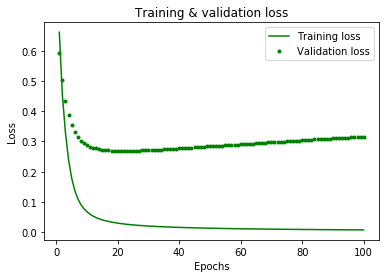

In [43]:
import matplotlib.pyplot as plt
loss_values = history['loss']
val_loss_values = history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'g.', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

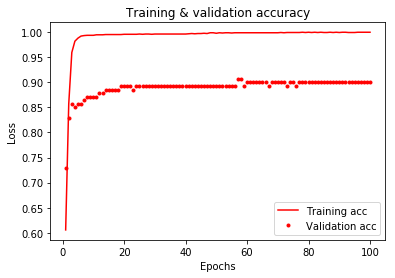

In [44]:
acc_values = history['acc'] 
val_acc_values = history['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'r.', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Period Classification (multi-class)

In [45]:
# create a dataframe (period) for CNN - train set 
period_df.columns = ['period']
doc_vec_df_with_period = pd.concat([doc_vec_df,period_df], axis = 1)
doc_vec_df_with_period['period'] = doc_vec_df_with_period['period'].map(period_num)
X_train_period = doc_vec_df_with_period.drop(['period'], axis = 1)
y_train_period = doc_vec_df_with_period.period

In [46]:
# create a dataframe (period) for CNN - validation set
period_df_val_set = pd.DataFrame(validation_set_df['period'])
period_df_val_set.columns = ['period']
doc_vec_df_val_set_w_period = pd.concat([doc_vec_df_val_set,period_df_val_set], axis = 1)
doc_vec_df_val_set_w_period['period'] = doc_vec_df_val_set_w_period['period'].map(period_num)
X_val_period = doc_vec_df_val_set_w_period.drop(['period'], axis = 1)
y_val_period = doc_vec_df_val_set_w_period.period

In [47]:
# create a dataframe (period) for CNN - test set
period_df_test_set = pd.DataFrame(test_set_df['period'])
period_df_test_set.columns = ['period']
doc_vec_df_test_set_w_period = pd.concat([doc_vec_df_test_set,period_df_test_set], axis = 1)
doc_vec_df_test_set_w_period['period'] = doc_vec_df_test_set_w_period['period'].map(period_num)
X_test_period = doc_vec_df_test_set_w_period.drop(['period'], axis = 1)
y_test_period = doc_vec_df_test_set_w_period.period

In [48]:
y_train_period = keras.utils.to_categorical(y_train_period, len(period_num))
y_val_period = keras.utils.to_categorical(y_val_period, len(period_num))
y_test_period = keras.utils.to_categorical(y_test_period, len(period_num))

In [49]:
softmax_model_period = Sequential()
softmax_model_period.add(Dense(100, activation='relu', input_shape=(20,)))
softmax_model_period.add(Dense(50, activation='relu'))
softmax_model_period.add(Dense(2, activation='softmax'))
softmax_model_period.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [50]:
softmax_model_period.fit(X_train, y_train, epochs= 100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Train on 980 samples, validate on 70 samples
Epoch 1/100
980/980 [==============================] - 0s 375us/step - loss: 0.3615 - acc: 0.8724 - val_loss: 0.4362 - val_acc: 0.7714
Epoch 2/100
980/980 [==============================] - 0s 55us/step - loss: 0.1715 - acc: 0.9755 - val_loss: 0.3665 - val_acc: 0.8143
Epoch 3/100
980/980 [==============================] - 0s 57us/step - loss: 0.1089 - acc: 0.9816 - val_loss: 0.3399 - val_acc: 0.8286
Epoch 4/100
980/980 [==============================] - 0s 53us/step - loss: 0.0784 - acc: 0.9908 - val_loss: 0.3229 - val_acc: 0.8429
Epoch 5/100
980/980 [==============================] - 0s 50us/step - loss: 0.0611 - acc: 0.9918 - val_loss: 0.3135 - val_acc: 0.8429
Epoch 6/100
980/980 [==============================] - 0s 49us/step - loss: 0.0504 - acc: 0.9939 - val_loss: 0.3080 - val_acc: 0.8571
Epoch 7/100
980/980 [==============================] - 0s 49us/step - loss: 0.0431 - acc: 0.9939 - val_loss: 0.3036 - val_acc: 0.8571
Epoch 8/100
980/

980/980 [==============================] - 0s 51us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.3473 - val_acc: 0.8857
Epoch 62/100
980/980 [==============================] - 0s 62us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.3515 - val_acc: 0.8714
Epoch 63/100
980/980 [==============================] - 0s 52us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.3519 - val_acc: 0.8714
Epoch 64/100
980/980 [==============================] - 0s 46us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.3518 - val_acc: 0.8857
Epoch 65/100
980/980 [==============================] - 0s 48us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.3515 - val_acc: 0.8857
Epoch 66/100
980/980 [==============================] - 0s 51us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.3513 - val_acc: 0.8857
Epoch 67/100
980/980 [==============================] - 0s 42us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3549 - val_acc: 0.8714
Epoch 68/100
980/980 [==============================] - 0s 41us/step

#### Convolutional Neural Network (CNN)

#### Doc2Vec by Unique ID
- instead of using the target labels (gender, author, etc..), use unique id as label 
- this is going to give us the vector representation of each document

In [51]:
from collections import Counter

In [52]:
# Create TaggedDocument objects for train_corpus_unique_id
train_corpus_unique_id = []
for i in range(0, len(train_set_df)):
    doc = TaggedDocument(train_set_df['text'][i].split(), [i])   
    train_corpus_unique_id.append(doc)

In [53]:
model_unique_id = Doc2Vec(vector_size=vec_size,
                min_count=min_count,
                epochs=epochs,
                alpha = alpha,
                min_alpha = min_alpha)

model_unique_id.build_vocab(train_corpus_unique_id)

%time model_unique_id.train(train_corpus_unique_id, total_examples = model.corpus_count, epochs = model.epochs)

CPU times: user 6.42 s, sys: 470 ms, total: 6.89 s
Wall time: 3.11 s


In [54]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus_unique_id)):
    inferred_vector = model_unique_id.infer_vector(train_corpus_unique_id[doc_id].words)
    sims = model_unique_id.docvecs.most_similar([inferred_vector], topn=len(model_unique_id.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
#     second_ranks.append(sims[1])
    #see how many it got correct and how many it didn't 
Counter(ranks)

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



Counter({0: 972, 2: 1, 1: 6, 3: 1})

In [55]:
doc_vectors_unique_id = [model_unique_id.infer_vector(train_corpus_unique_id[i].words) for i in range(0,len(train_corpus_unique_id))]
doc_vectors_unique_id_df = pd.DataFrame(doc_vectors_unique_id)

In [56]:
train_set_labels = train_set_df[['author', 'sex', 'period']]

In [57]:
# reduce dimensionality to visualize the document vectors 
pca_unique = PCA(n_components = 3)
pca_unique.fit(doc_vectors_unique_id)
doc_vectors_3d_unique_id = pca_unique.transform(doc_vectors_unique_id) # transform the vectors to 3d space
explained_variance_ratio_unique = np.cumsum(pca_unique.explained_variance_ratio_)[2]
explained_variance_ratio_unique

0.4096685496397846

In [58]:
doc_vectors_unique_id_3d_df = pd.DataFrame(doc_vectors_3d_unique_id)
doc_vectors_unique_id_3d_df.columns = ['x', 'y', 'z']
doc_vec_unique_id_df = pd.concat([doc_vectors_unique_id_3d_df, train_set_labels], axis = 1)
doc_vec_unique_id_df['author'] = doc_vec_unique_id_df['author'].map(author_num)
doc_vec_unique_id_df['sex'] = doc_vec_unique_id_df['sex'].map(sex_num)
doc_vec_unique_id_df['period'] = doc_vec_unique_id_df['period'].map(period_num)

doc_vectors_unique_id_df = pd.concat([doc_vectors_unique_id_df, train_set_labels], axis = 1)

In [60]:
# by author
trace1_unique_author = go.Scatter3d(
    x = doc_vec_unique_id_df['x'],
    y = doc_vec_unique_id_df['y'],
    z = doc_vec_unique_id_df['z'],
    mode='markers',
    marker=dict(
        size=5,
        colorbar=dict(
            tickmode = 'array',
            tickvals = list(range(0,15)),
            ticktext = authors
            ),
        color= doc_vec_unique_id_df['author'],
        colorscale='Viridis'
    )
)

layout = go.Layout(showlegend=False)

# # Make a figure object
data = [trace1_unique_author]
fig = go.Figure(data= data, layout = layout)

# Send to Plotly and show in notebook
iplot(fig, filename='test1')

In [86]:
def color_map(category):
    cmap = plt.cm.viridis
    cmaplist = [cmap(i) for i in range(cmap.N)]
    jump = 256//len(category)
    cmaplist_ = [cmaplist[jump*i] for i in range(0,len(category))]
    return cmaplist_

In [90]:
cmap_author = color_map(authors)
cmap_sex = color_map(genders)
cmap_periods = color_map(periods)

In [94]:
# by author
traces_for_plot_unique = []
for key, value in author_num.items():
    df = doc_vec_unique_id_df[doc_vec_unique_id_df['author'] == value]
    traces_for_plot_unique.append(df)

traces_unique_author = []
for trace in traces_for_plot_unique:
    trace1 = go.Scatter3d(
    x = trace['x'],
    y = trace['y'],
    z = trace['z'],
    mode='markers',
    name = authors[trace['author'].values[0]],
    marker=dict(
        size=5,
        color= 'rgba' + str(cmap_author[(trace['author'].values[0])]),
    )
    )
    traces_unique_author.append(trace1)

layout = go.Layout(showlegend=True)
# # Make a figure object
fig = go.Figure(data= traces_unique_author, layout = layout)

# Send to Plotly and show in notebook
iplot(fig, filename='test1')

In [101]:
# by gender
traces_for_plot_unique_sex = []
for key, value in sex_num.items():
    df = doc_vec_unique_id_df[doc_vec_unique_id_df['sex'] == value]
    traces_for_plot_unique_sex.append(df)

traces_unique_gender = []
for trace in traces_for_plot_unique_sex:
    trace1 = go.Scatter3d(
    x = trace['x'],
    y = trace['y'],
    z = trace['z'],
    mode='markers',
    name = genders[trace['sex'].values[0]],
    marker=dict(
        size=5,
        color= 'rgba' + str(cmap_sex[(trace['sex'].values[0])]),
    )
    )
    traces_unique_gender.append(trace1)

layout = go.Layout(showlegend=True)
# # Make a figure object
fig = go.Figure(data= traces_unique_gender, layout = layout)

# Send to Plotly and show in notebook
iplot(fig, filename='test1')

In [ ]:
# by period
traces_for_plot_unique_period = []
for key, value in sex_num.items():
    df = doc_vec_unique_id_df[doc_vec_unique_id_df['sex'] == value]
    traces_for_plot_unique_period.append(df)

traces_unique_gender = []
for trace in traces_for_plot_unique_sex:
    trace1 = go.Scatter3d(
    x = trace['x'],
    y = trace['y'],
    z = trace['z'],
    mode='markers',
    name = genders[trace['sex'].values[0]],
    marker=dict(
        size=5,
        color= 'rgba' + str(cmap_sex[(trace['sex'].values[0])]),
    )
    )
    traces_unique_gender.append(trace1)

layout = go.Layout(showlegend=True)
# # Make a figure object
fig = go.Figure(data= traces_unique_gender, layout = layout)

# Send to Plotly and show in notebook
iplot(fig, filename='test1')

#### MLP for Unique-ID Dataframes

In [ ]:
doc_vectors_unique_id_df.head()

In [ ]:
# create a dataframe (gender) for CNN - train set 
doc_vectors_unique_id_df['sex'] = doc_vectors_unique_id_df['sex'].map(sex_num)
X_train_unique_id = doc_vectors_unique_id_df.drop(['author', 'sex', 'period'], axis = 1)
y_train_unique_id = doc_vectors_unique_id_df.sex

In [ ]:
# vector representation of all documents in list form (for validation set)
doc_vectors_val_unique = [model_unique_id.infer_vector(val_corpus[i]) for i in range(0,len(val_corpus))]
# vector representation of all documents in list form (for test set)
doc_vectors_test_unique = [model_unique_id.infer_vector(test_corpus[i]) for i in range(0,len(test_corpus))]

In [ ]:
# create a dataframe (gender) for CNN - validation set
doc_vec_df_unique_id_val_set = pd.DataFrame(doc_vectors_val_unique)
gender_df_val_set_unique = pd.DataFrame(validation_set_df['sex'])
gender_df_val_set_unique.columns = ['sex']
doc_vec_df_val_set_w_gender_unique = pd.concat([doc_vec_df_unique_id_val_set,gender_df_val_set_unique], axis = 1)
doc_vec_df_val_set_w_gender_unique['sex'] = doc_vec_df_val_set_w_gender_unique['sex'].map(sex_num)
X_val_unique = doc_vec_df_val_set_w_gender_unique.drop(['sex'], axis = 1)
y_val_unique = doc_vec_df_val_set_w_gender_unique.sex

# create a dataframe (gender) for CNN - test set
doc_vec_df_test_set_unique = pd.DataFrame(doc_vectors_test_unique)
gender_df_test_set_unique = pd.DataFrame(test_set_df['sex'])
gender_df_test_set_unique.columns = ['sex']
doc_vec_df_test_set_w_gender_unique = pd.concat([doc_vec_df_test_set_unique,gender_df_test_set_unique], axis = 1)
doc_vec_df_test_set_w_gender_unique['sex'] = doc_vec_df_test_set_w_gender_unique['sex'].map(sex_num)
X_test_unique = doc_vec_df_test_set_w_gender_unique.drop(['sex'], axis = 1)
y_test_unique = doc_vec_df_test_set_w_gender_unique.sex

In [ ]:
y_train_unique_id = keras.utils.to_categorical(y_train_unique_id, 2)
y_val_unique = keras.utils.to_categorical(y_val_unique, 2)
y_test_unique = keras.utils.to_categorical(y_test_unique, 2)

In [ ]:
sigmoid_model_unique = Sequential()
sigmoid_model_unique.add(Dense(100, activation='relu', input_shape=(20,)))
sigmoid_model_unique.add(Dense(50, activation='relu'))
sigmoid_model_unique.add(Dense(2, activation='sigmoid'))
sigmoid_model_unique.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
model_unique = sigmoid_model_unique.fit(X_train_unique_id, y_train_unique_id, epochs= 100, batch_size=32, verbose=1, validation_data=(X_val_unique, y_val_unique))